# Heart Disease Prediction

## 1) Import the necessary library

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2) Load the dataset

In [2]:
df = pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## 3) Gathering of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
#To check the dimension of the dataset
df.shape

(4240, 16)

In [5]:
#To describe the statistica information of the dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# Education is not relate with heart disease prediction
#df.drop('education',axis = 1,inplace = True)

In [7]:
#To check the null value of the each column of the dataset
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
#To fill the missing binary columns with the mode value
bin_cols = ["male","currentSmoker","prevalentStroke","prevalentHyp","diabetes",'education']
#Fill the missing values with the most frequent value
for col in bin_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace = True)

In [9]:
#To fill the missing numeric columns with the mode value
numeric_cols = ['cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val,inplace = True)

In [10]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
#Tranforming the text into the integer
df['TenYearCHD'].unique()

array([0, 1], dtype=int64)

In [12]:
df['TenYearCHD'].value_counts(normalize=True)

TenYearCHD
0    0.848113
1    0.151887
Name: proportion, dtype: float64

In [13]:
df['prevalentStroke'].unique()

array([0, 1], dtype=int64)

In [14]:
df['prevalentStroke'].value_counts(normalize=True)

prevalentStroke
0    0.994104
1    0.005896
Name: proportion, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [16]:
df['male'].value_counts()

male
0    2420
1    1820
Name: count, dtype: int64

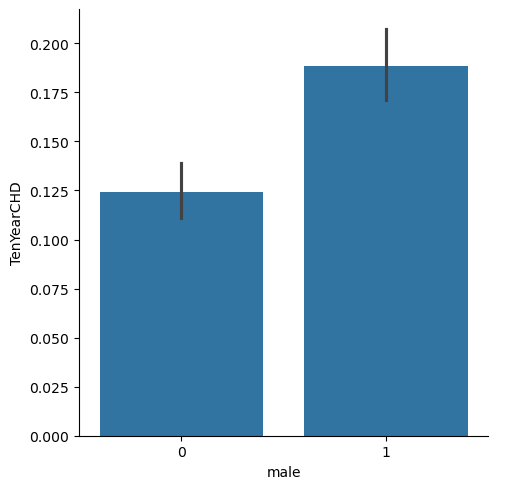

In [17]:
sns.catplot(data = df, y = 'TenYearCHD',x ='male',kind = 'bar')
plt.show()

In [18]:
#To check whether the data is balanced or not
df['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

# Exploratory data analysis

In [19]:
df['TenYearCHD'].value_counts(normalize = True)

TenYearCHD
0    0.848113
1    0.151887
Name: proportion, dtype: float64

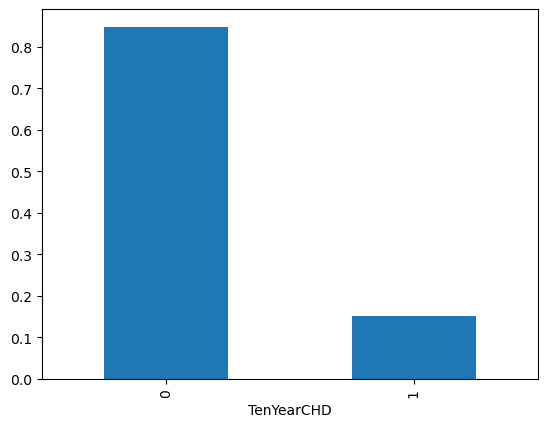

In [20]:
df['TenYearCHD'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

In [21]:
df.groupby(['male']).mean(numeric_only=True)

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
0,49.795868,1.943388,0.408678,5.694215,0.036777,0.006198,0.308264,0.023554,239.344628,133.040083,82.296694,25.510083,77.097934,81.403306,0.124380
1,49.293407,1.970879,0.607692,13.265934,0.019231,0.005495,0.313736,0.028571,233.108242,131.443132,83.696978,26.183176,74.257692,81.863736,0.188462


In [22]:
df.groupby('male')['TenYearCHD'].mean()

male
0    0.124380
1    0.188462
Name: TenYearCHD, dtype: float64

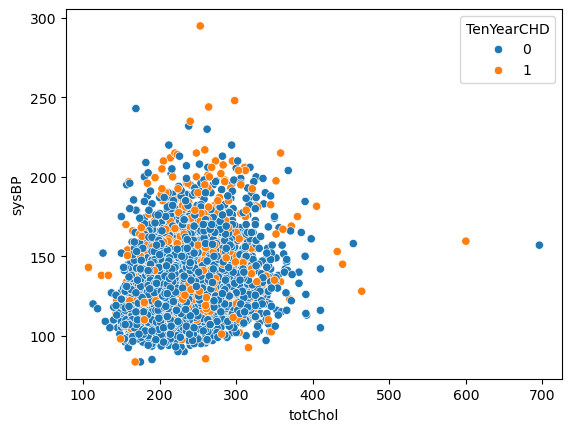

In [23]:
plt.figure(figure = (12,7))
sns.scatterplot(data = df,y = 'sysBP',x = 'totChol',hue = 'TenYearCHD')
plt.show()

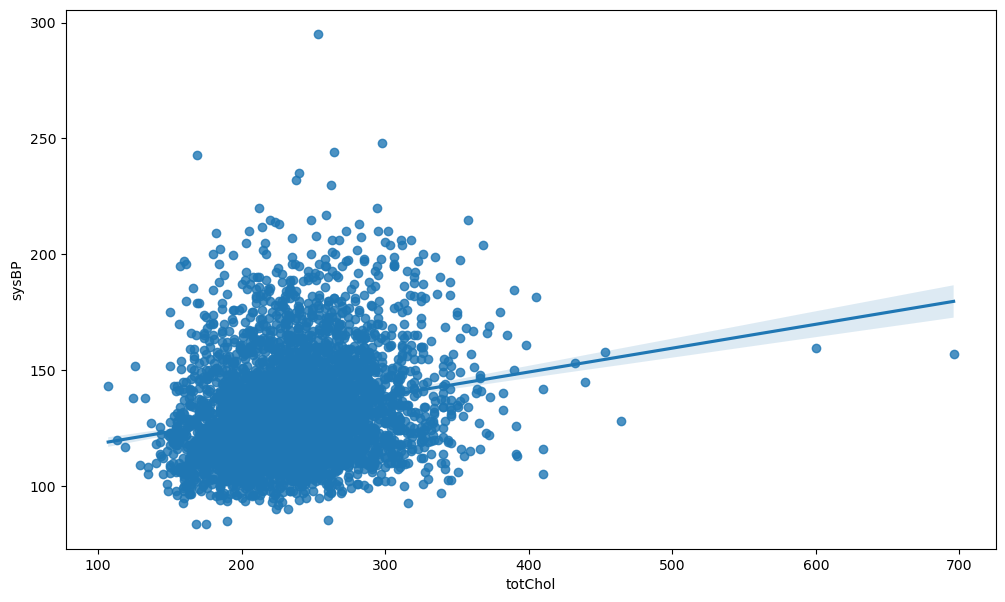

In [24]:
plt.figure(figsize=(12,7))
sns.regplot(data = df,y ='sysBP',x ='totChol')
plt.show()

## Selecting and analyzing the dummy variables

In [25]:
#sperating the dummy variable
df.nunique().sort_values()

male                  2
currentSmoker         2
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
TenYearCHD            2
education             4
cigsPerDay           33
age                  39
heartRate            73
glucose             143
diaBP               146
sysBP               234
totChol             248
BMI                1364
dtype: int64

In [26]:
df['BPMeds'] = df['BPMeds'].astype('int64')

In [27]:
df_dum = df.select_dtypes(include = ['int'])
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   male             4240 non-null   int64
 1   age              4240 non-null   int64
 2   currentSmoker    4240 non-null   int64
 3   BPMeds           4240 non-null   int64
 4   prevalentStroke  4240 non-null   int64
 5   prevalentHyp     4240 non-null   int64
 6   diabetes         4240 non-null   int64
 7   TenYearCHD       4240 non-null   int64
dtypes: int64(8)
memory usage: 265.1 KB


In [28]:
#Creating the subset of the dummy variables which are labeled as float
col_int = df.nunique().reset_index()
col_int.columns = ['features','object']
col_int['object'] = col_int['object'].astype('int64')
col_int = col_int.sort_values(by ='object')
col_int = col_int[col_int.object<10]
col_int.features.values

array(['male', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD', 'education'],
      dtype=object)

In [29]:
df_dum = df[col_int.features.values]
df_dum

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,education
0,1,0,0,0,0,0,0,4.0
1,0,0,0,0,0,0,0,2.0
2,1,1,0,0,0,0,0,1.0
3,0,1,0,0,1,0,1,3.0
4,0,1,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...
4235,0,1,0,0,0,0,0,2.0
4236,0,1,0,0,0,0,0,1.0
4237,0,0,0,0,0,0,0,2.0
4238,1,0,0,0,1,0,0,3.0


<Axes: xlabel='currentSmoker', ylabel='count'>

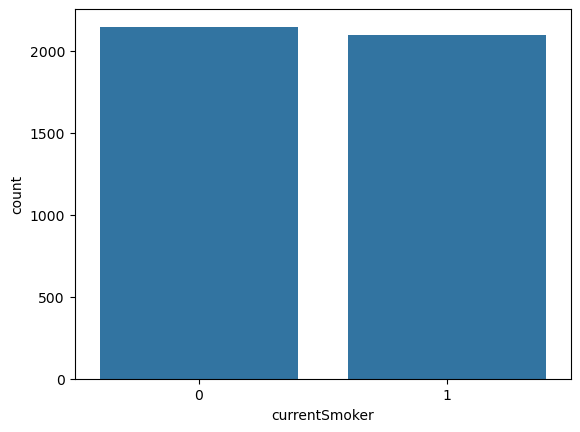

In [30]:
#To analyse the data wrt to cig per day
sns.countplot(data = df_dum,x ='currentSmoker')

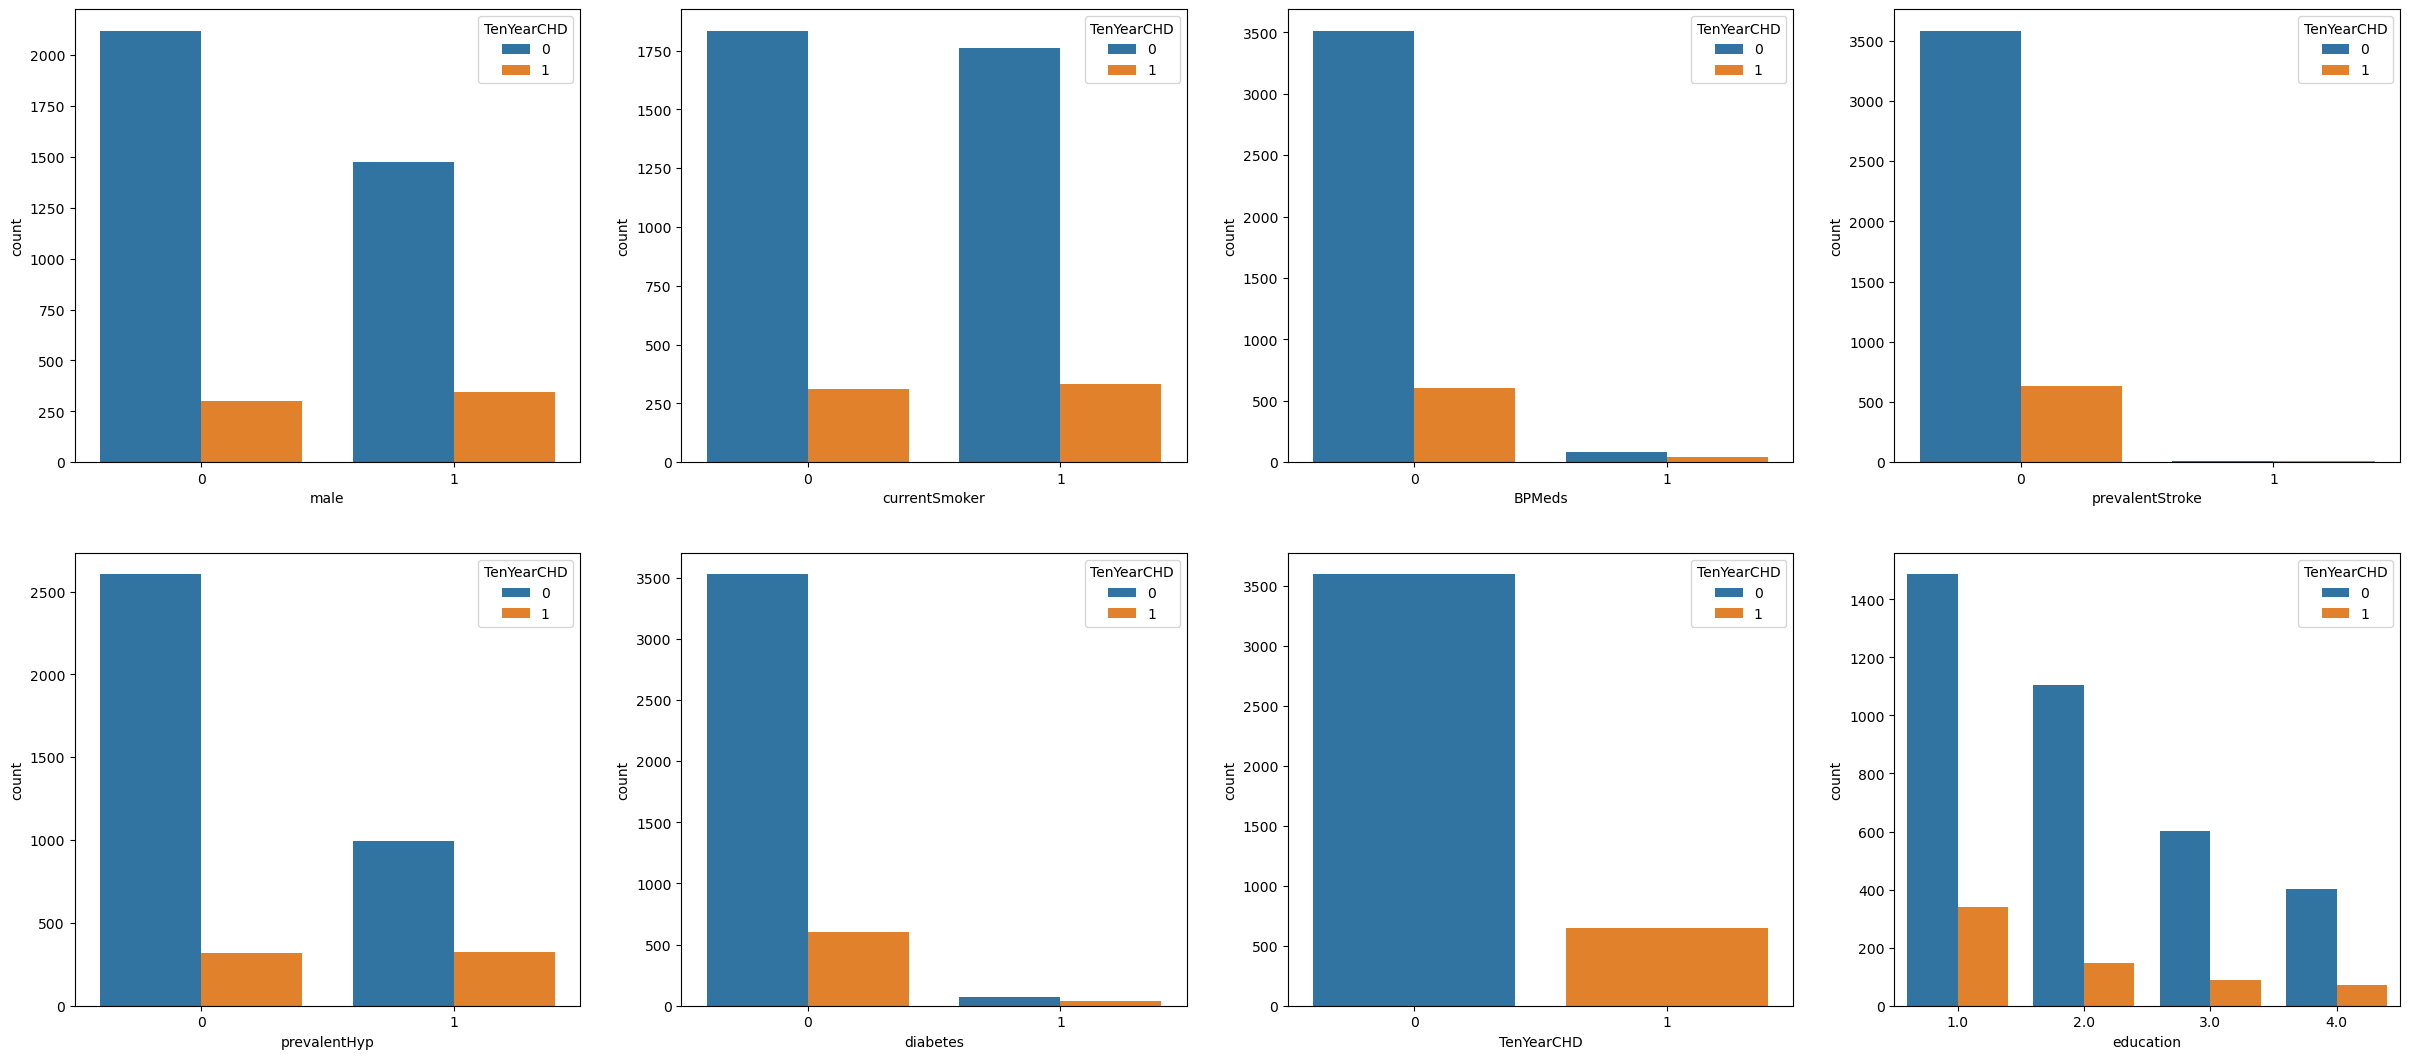

In [31]:
plt.figure(figsize=(30,20))
for i in enumerate(df_dum.columns):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(x = i[1],hue = 'TenYearCHD',data =df_dum)

## Selecting and analyzing the Continuous variable

In [32]:
df_cont = df.select_dtypes(include=['float'])
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   education   4240 non-null   float64
 1   cigsPerDay  4240 non-null   float64
 2   totChol     4240 non-null   float64
 3   sysBP       4240 non-null   float64
 4   diaBP       4240 non-null   float64
 5   BMI         4240 non-null   float64
 6   heartRate   4240 non-null   float64
 7   glucose     4240 non-null   float64
dtypes: float64(8)
memory usage: 265.1 KB


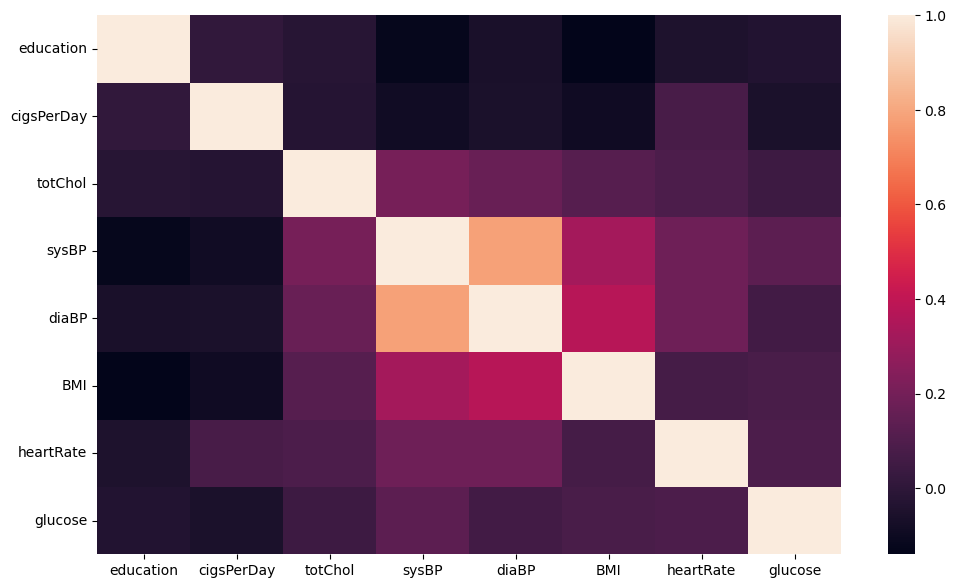

In [33]:
plt.figure(figsize = (12,7))
sns.heatmap(df_cont.corr())
plt.show()

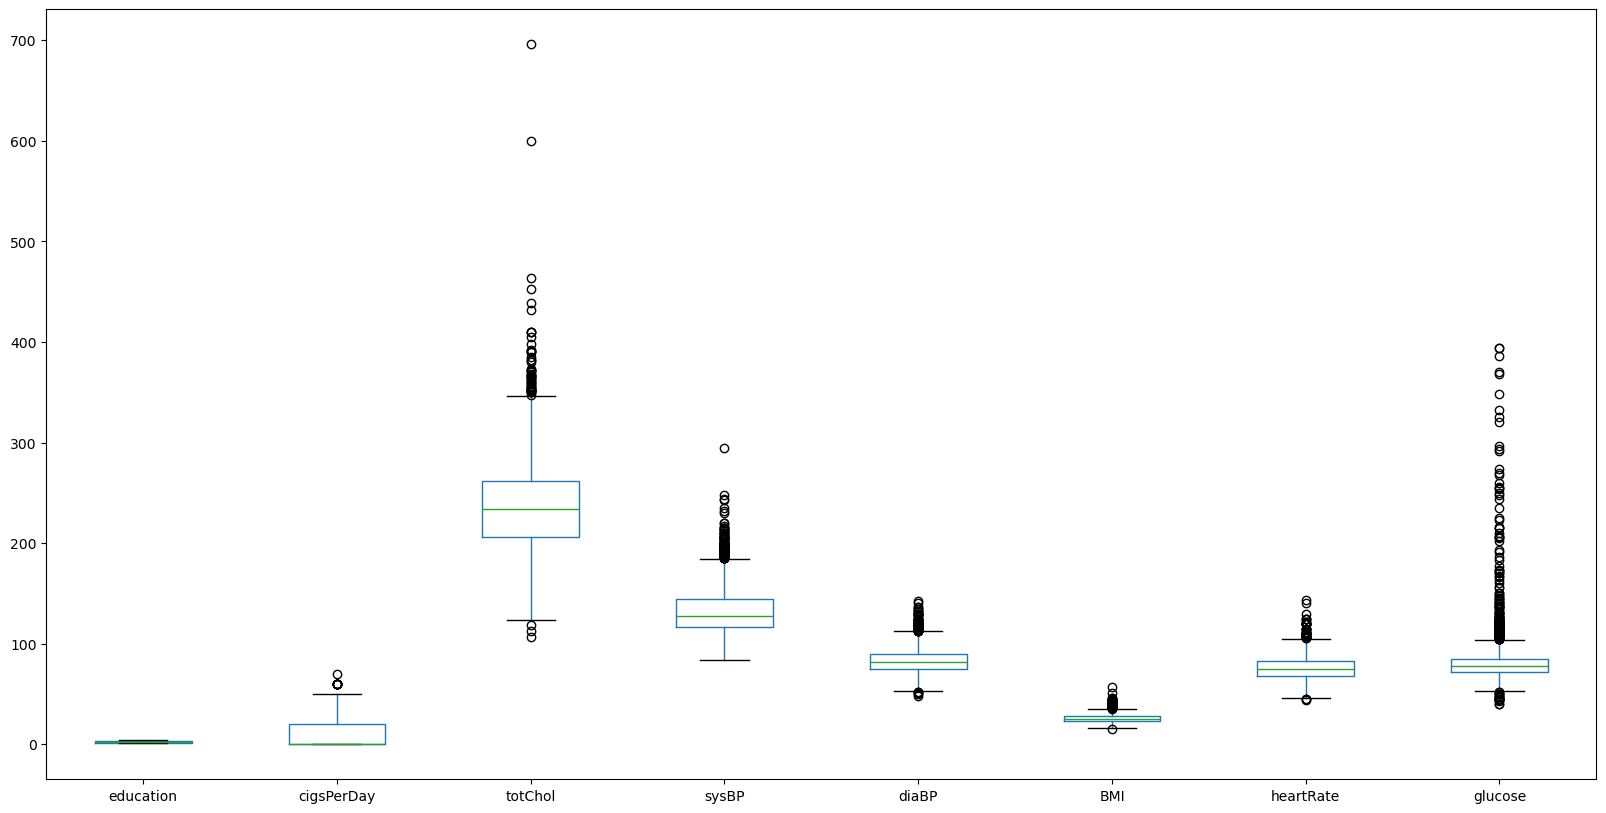

In [34]:
plt.figure(figsize=(20,10))
df_cont.boxplot(grid=False)
plt.show()

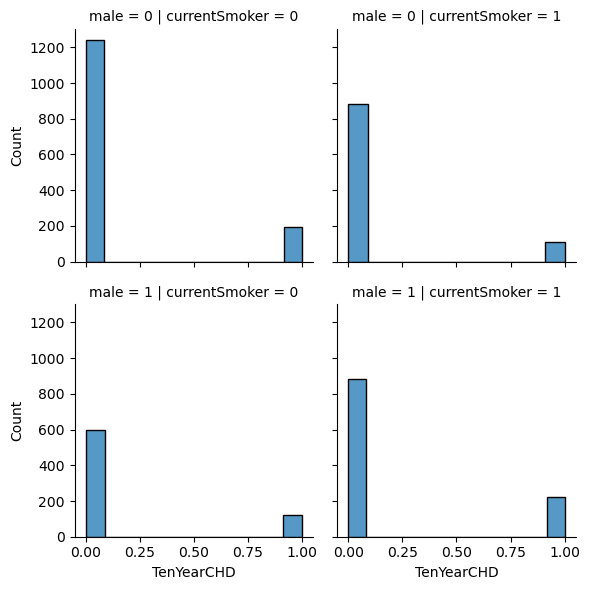

In [35]:
g = sns.FacetGrid(df,row = 'male',col = 'currentSmoker')
g.map(sns.histplot,'TenYearCHD')
plt.show()

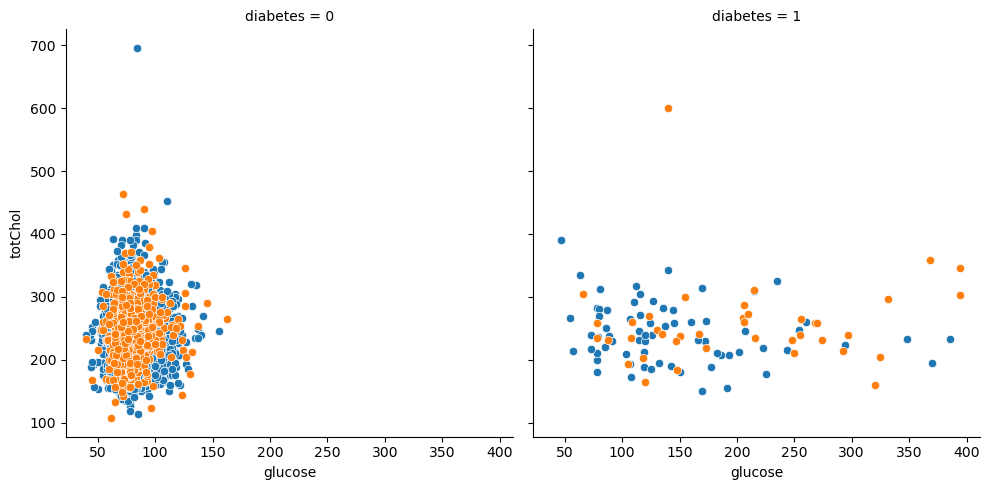

In [36]:
g = sns.FacetGrid(df,hue = 'TenYearCHD',col='diabetes',height = 5)
g.map(sns.scatterplot,'glucose','totChol')
plt.show()

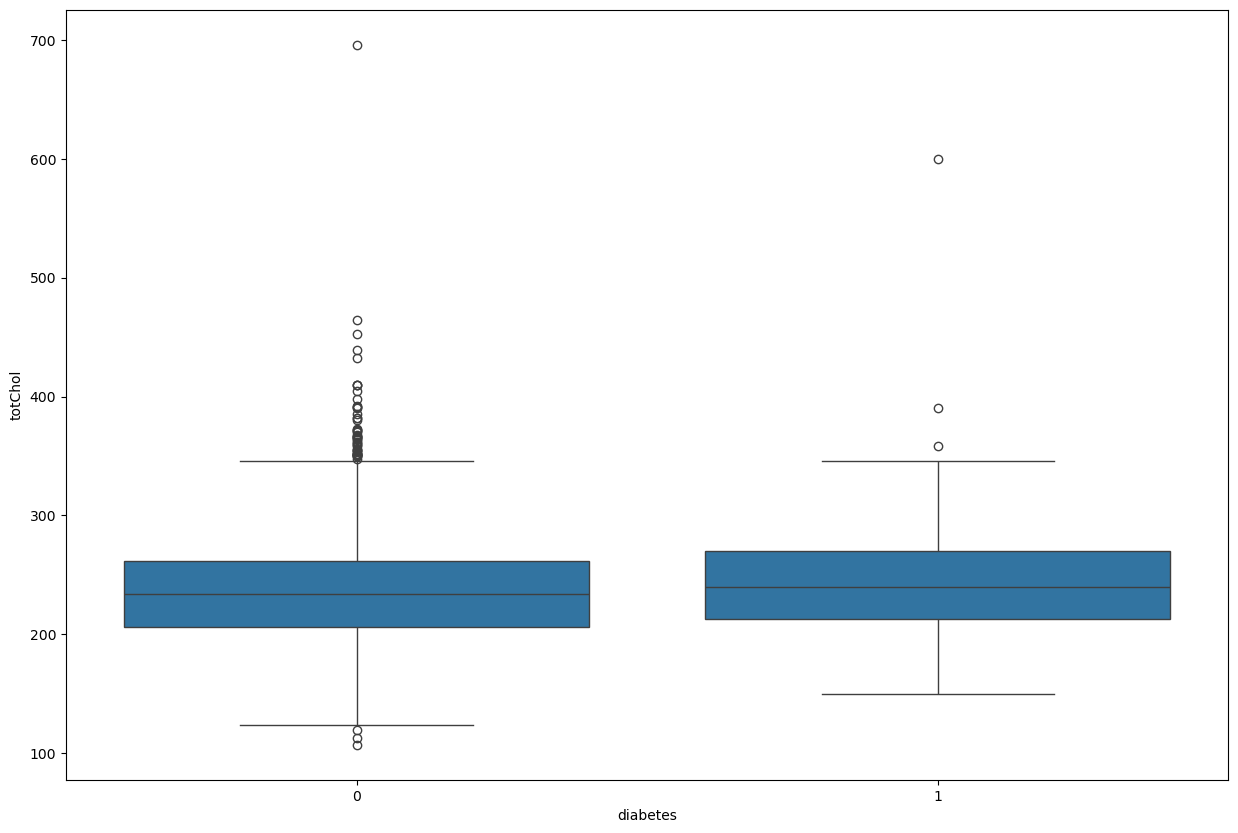

In [37]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = df,x ='diabetes',y = 'totChol',ax=ax)
plt.show()

In [38]:
df_cont

,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,4.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,2.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,3.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,3.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...
4235,2.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,1.0,15.0,210.0,126.5,87.0,19.16,86.0,78.0
4237,2.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0
4238,3.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0


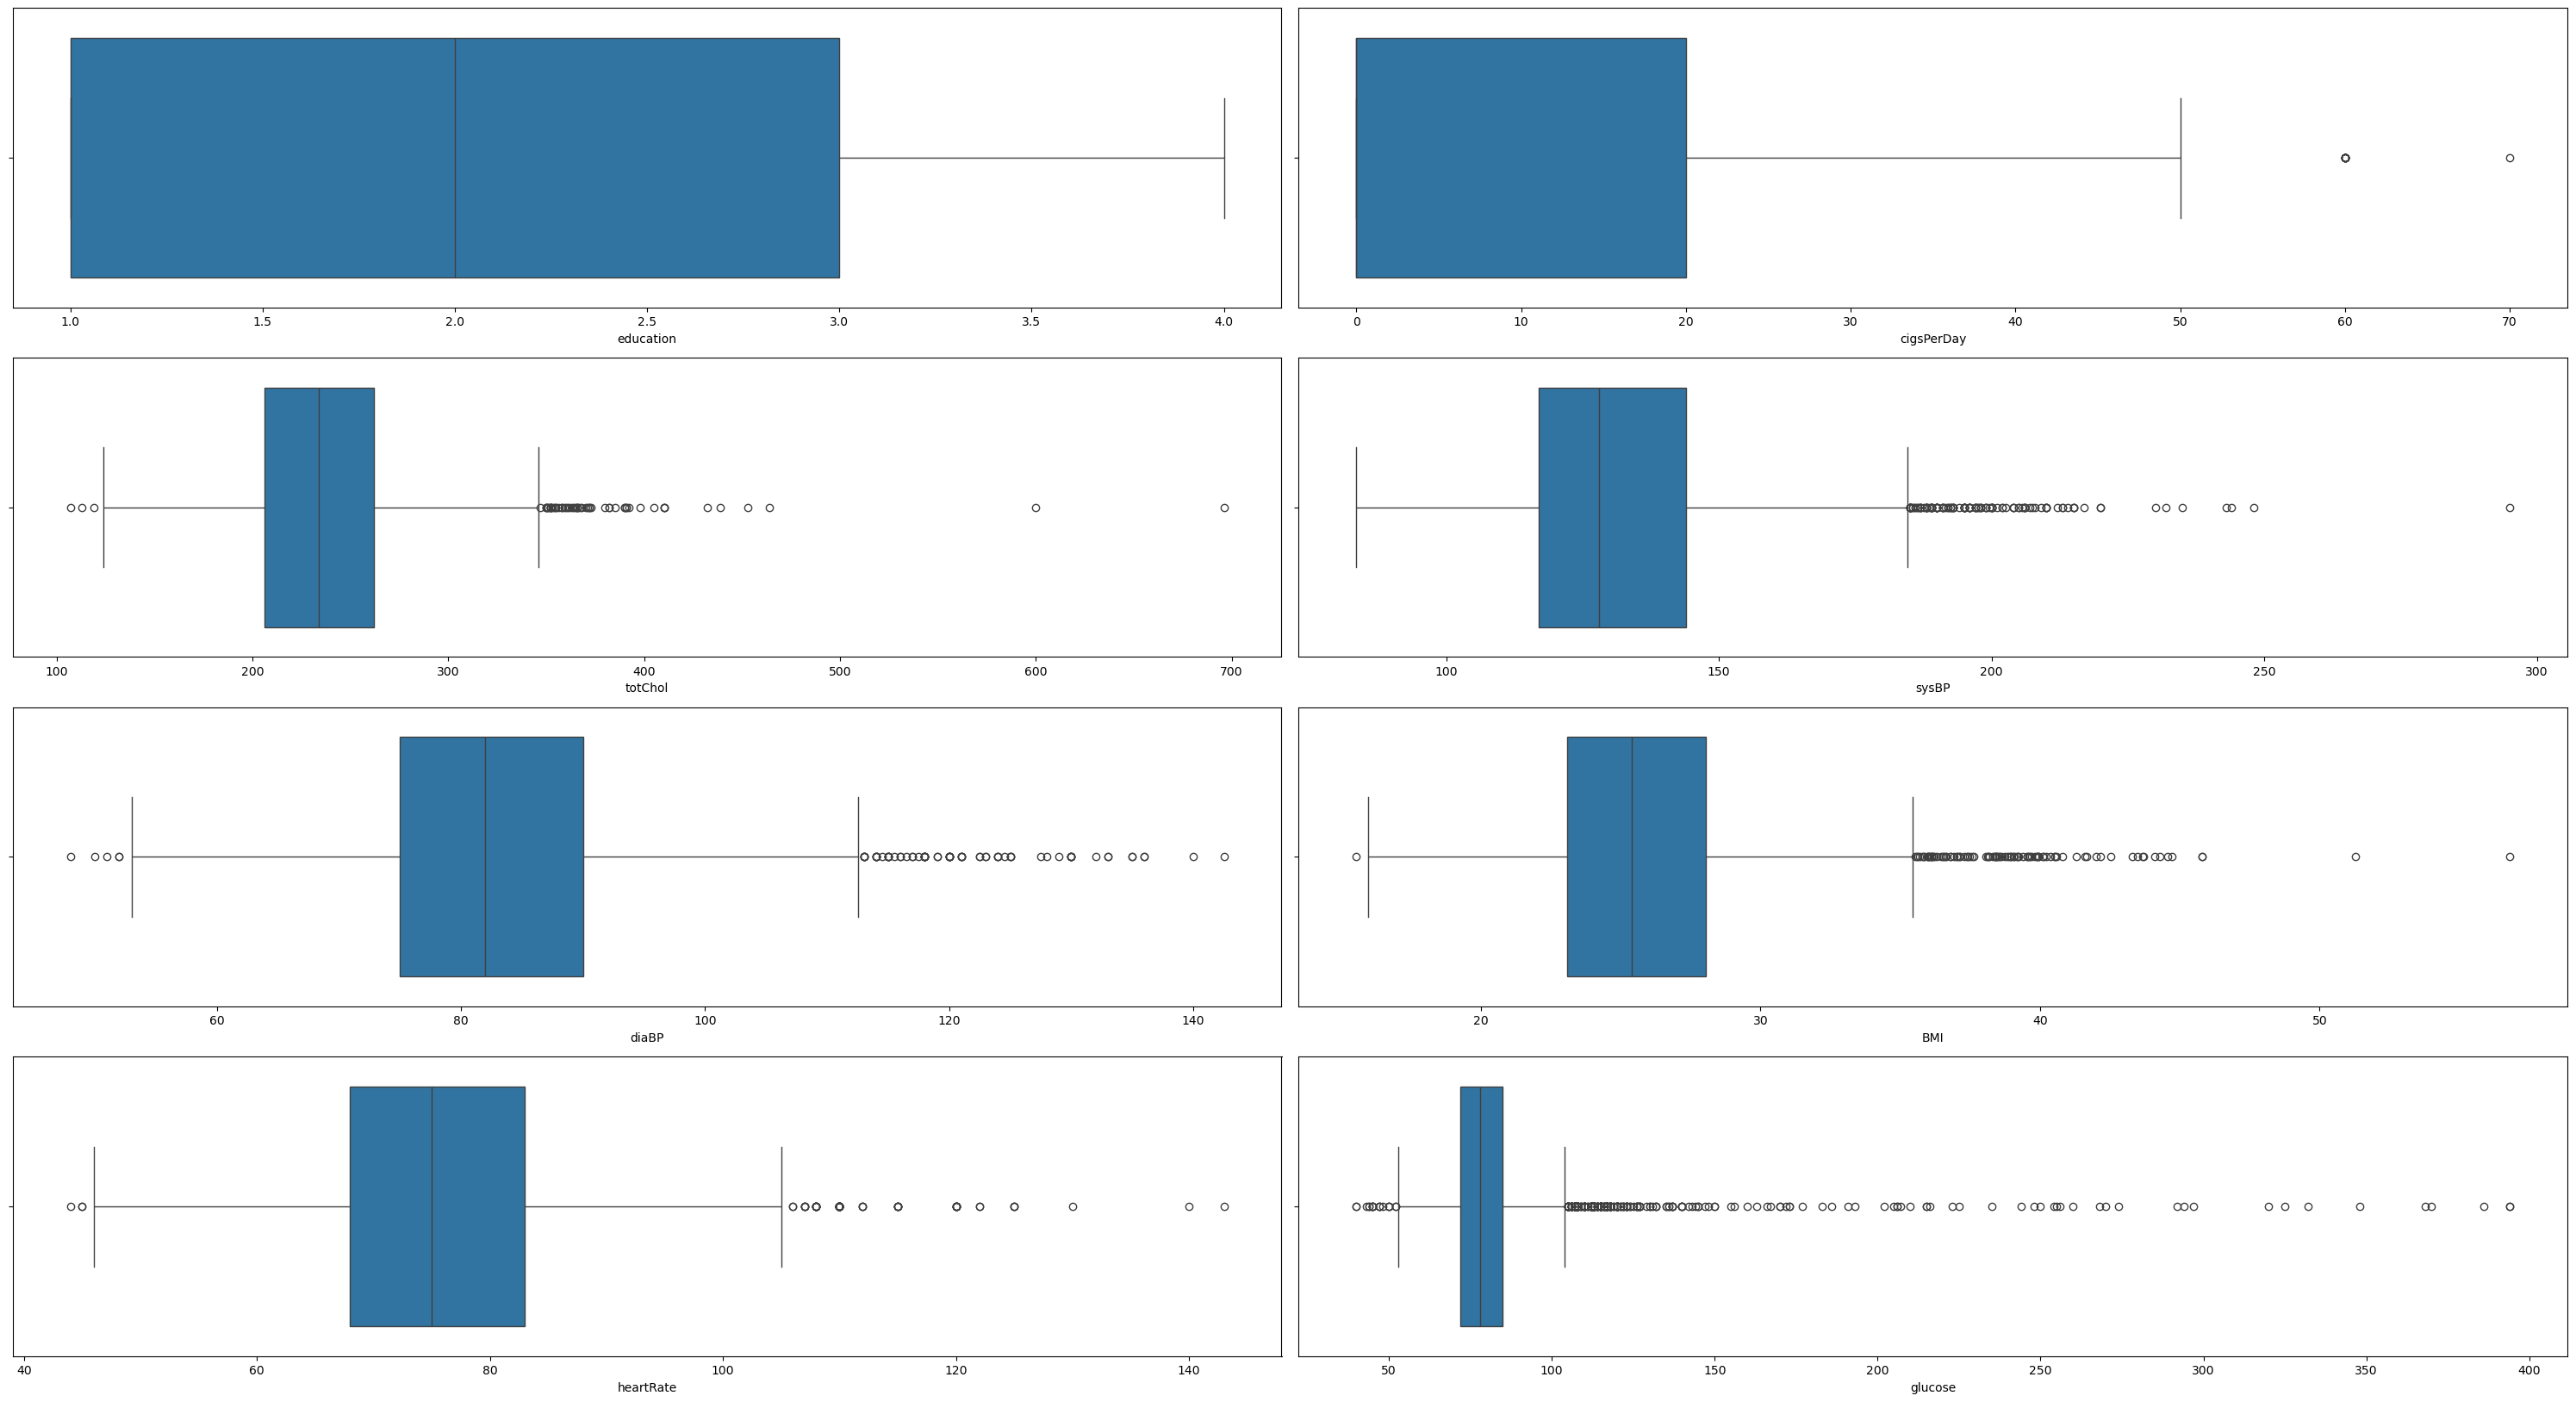

In [39]:
plt.figure(figsize=(30,20))
for i in enumerate(df_cont.columns):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=i[1],data = df_cont)
plt.tight_layout()

# Analyzing the Target variables

The imbalance in the target variable

In [40]:
df['TenYearCHD'].value_counts() 

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD'>

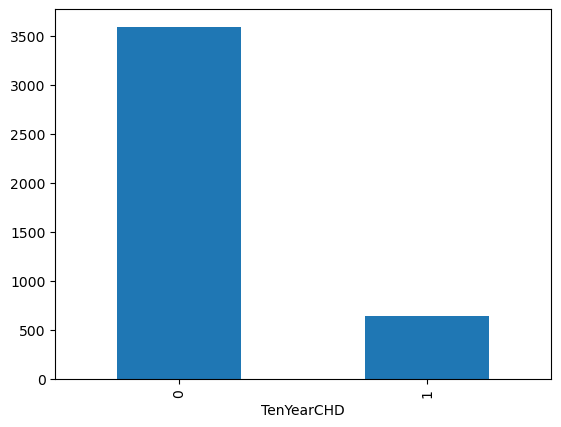

In [41]:
df['TenYearCHD'].value_counts().plot(kind = 'bar')

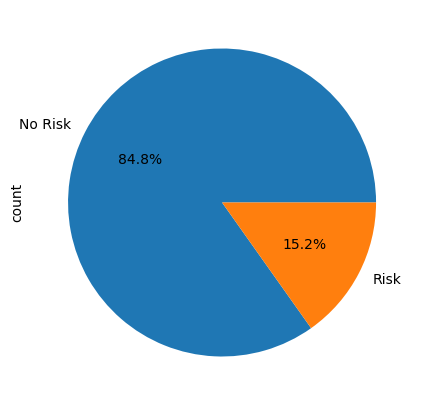

In [42]:
#Visualise the distribution in target variable pie-chart
plt.figure(figsize=(6,5))
df['TenYearCHD'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',labels = ['No Risk','Risk'])
plt.show()

## Correlation analysis 

<Axes: title={'center': 'Correlation with Heart disease'}>

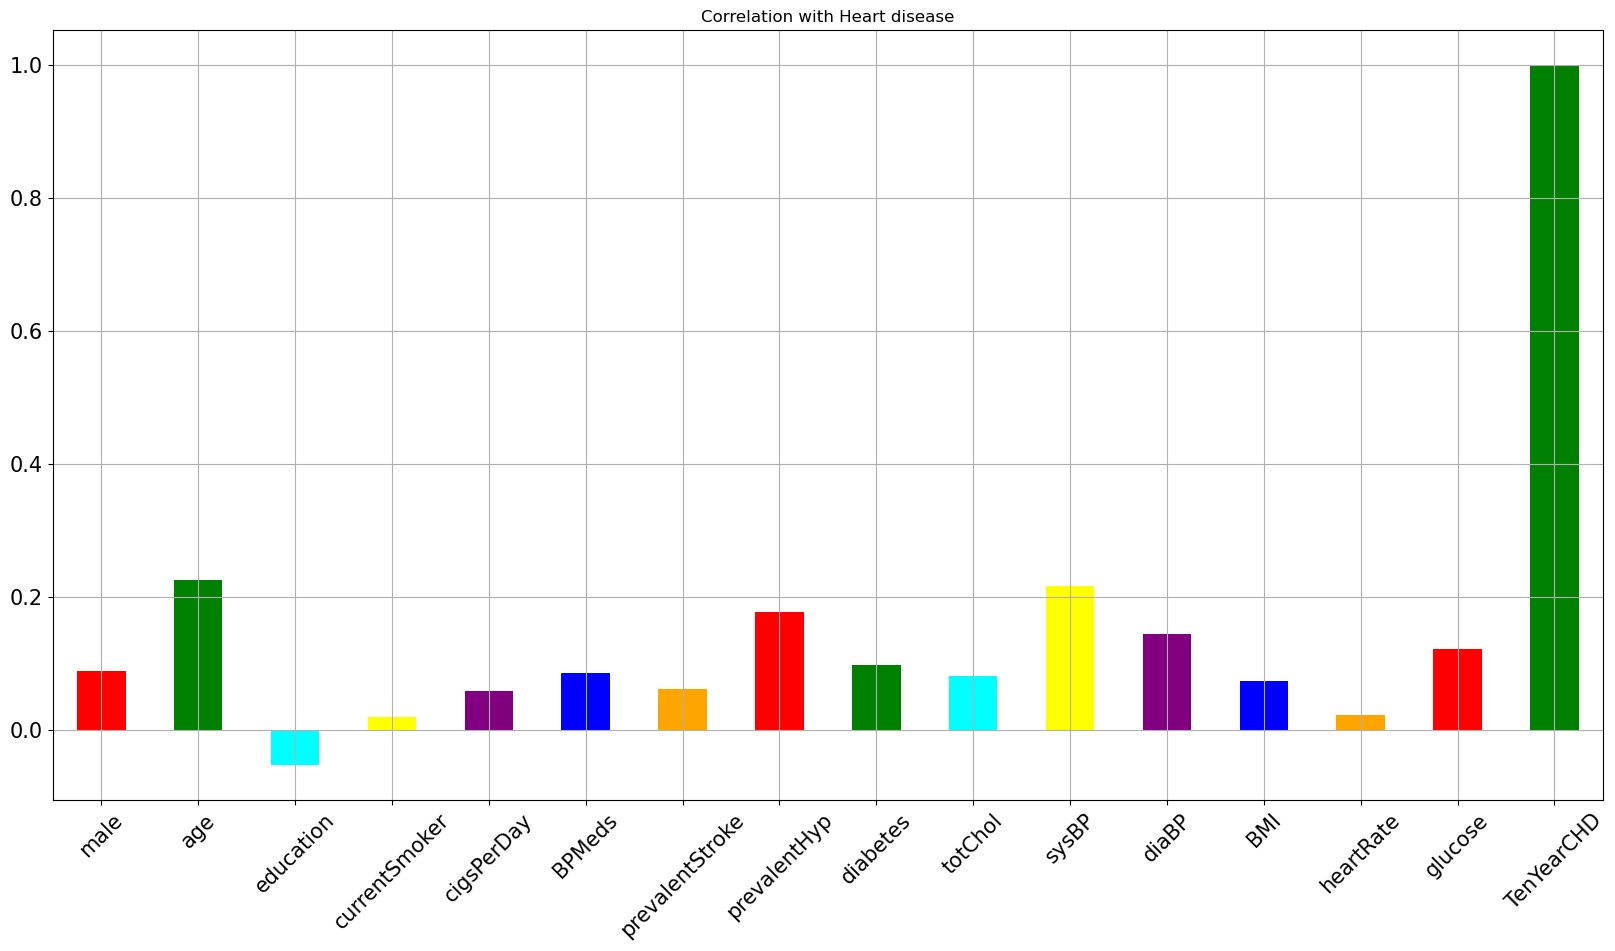

In [43]:
c = ['red', 'green', 'cyan', 'yellow', 'purple', 'blue', 'orange']
df.corrwith(df['TenYearCHD']).plot.bar(
    figsize=(20, 10),
    title='Correlation with Heart disease',
    fontsize=15,  # corrected from `font_size` to `fontsize`
    rot=45,
    grid=True,
    color=c
    )


In [44]:
# Education is not relate with heart disease prediction
df.drop('education',axis = 1,inplace = True)

## Resampling of the Dataset 

In [45]:
from sklearn.utils import resample
#Seperate majority and minority classes
df_majority = df[df['TenYearCHD'] == 0]
df_minority = df[df['TenYearCHD'] == 1]
#Unsample minority classes
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = len(df_majority),
                                random_state = 42)
# Combine majority class with upsamples minority class
df_balanced = pd.concat([df_majority,df_minority_upsampled])

In [46]:
df_balanced['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1    3596
Name: count, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   int64  
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 497.0 KB


## Splitting of the Dataset

In [48]:
#To divide the data into training and testing
from sklearn.model_selection import train_test_split
#Seperate the independent variable and the target variable
X = df_balanced.drop(columns = ['TenYearCHD'])
y = df_balanced['TenYearCHD']
#split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [50]:
X_train_scaled.shape

(5753, 14)

In [51]:
X_test_scaled.shape

(1439, 14)

In [52]:
!pip install xgboost

## Model Selection and Training

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

# Create a dictionary to store the results
results = {}


# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

RandomForestClassifier Accuracy: 0.9680333564975677
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       735
           1       0.95      0.99      0.97       704

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439

Confusion Matrix for RandomForestClassifier:
[[698  37]
 [  9 695]]
LogisticRegression Accuracy: 0.6532314107018763
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       735
           1       0.64      0.67      0.65       704

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439

Confusion Matrix for LogisticRegression:
[[471 264]
 [235 469]]
SVC Accuracy: 0.69

# Metrics Evaluation

In [55]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])
score = []
# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    score.append(accuracy)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    # Example row data to append
    new_row = pd.DataFrame({'Model': [clf_name], 'Accuracy': [accuracy], 'F1-Score': [f1_score], 
                        'Precision': [precision], 'Recall': [recall]})

    # Use pd.concat to add the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)
    
    # Append results to DataFrame

results_df

,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.969423,0.969424,0.970160,0.969423
1,LogisticRegression,0.653231,0.653241,0.653782,0.653231
2,SVC,0.690063,0.689977,0.691183,0.690063
3,KNeighborsClassifier,0.785268,0.781514,0.811568,0.785268
4,DecisionTreeClassifier,0.845726,0.845744,0.846026,0.845726
5,XGBClassifier,0.808200,0.806292,0.817593,0.808200


In [60]:
algorithms = ["Random Forest","Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(score[i])+" %")

The accuracy score achieved using Random Forest is: 0.9694232105628909 %
The accuracy score achieved using Logistic Regression is: 0.6532314107018763 %
The accuracy score achieved using Support Vector Machine is: 0.6900625434329395 %
The accuracy score achieved using K-Nearest Neighbors is: 0.7852675469075747 %
The accuracy score achieved using Decision Tree is: 0.8457261987491314 %
The accuracy score achieved using XGBoost is: 0.8082001389854065 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

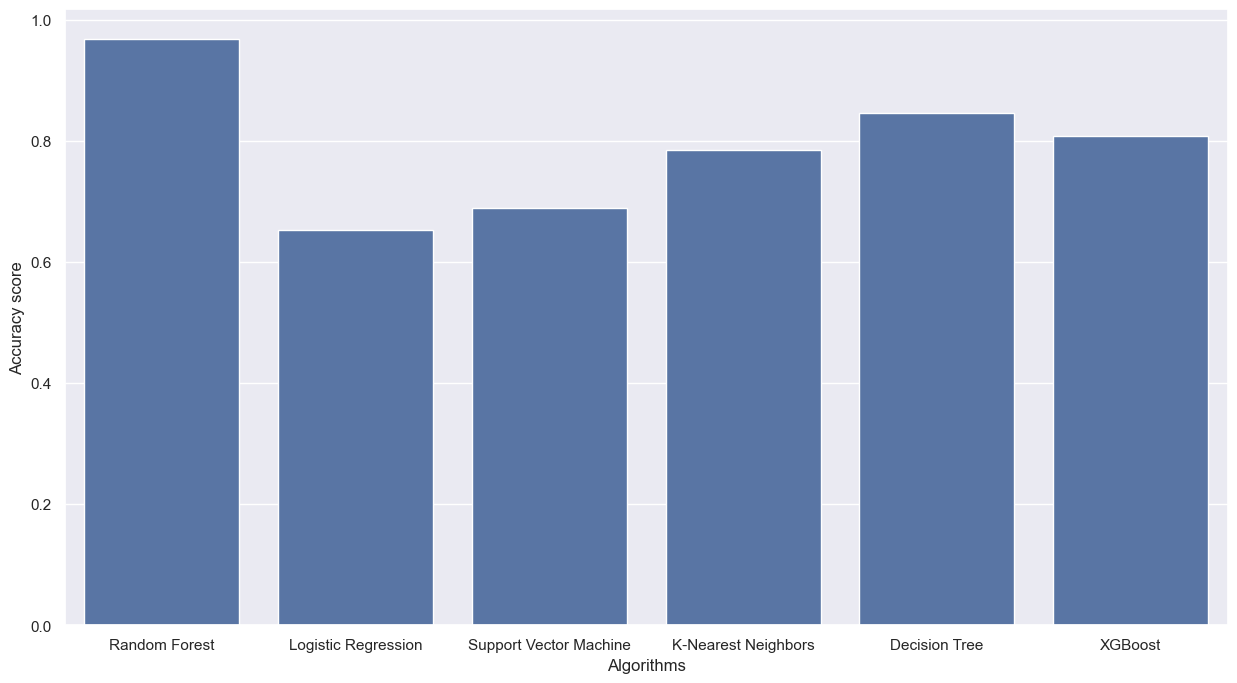

In [63]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=score)

## Selecting the Right Model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
print("Predicted class ",rf_classifier.predict(X_test_scaled[10].reshape(1,-1))[0])
print("Actual_class",y_test.iloc[10])

In [ ]:
print("Predicted class ",rf_classifier.predict(X_test_scaled[200].reshape(1,-1))[0])
print("Actual_class",y_test.iloc[200])

## Model Deployment 

In [ ]:
import pickle
pickle.dump(rf_classifier,open("Models/rf_classifier.pkl",'wb'))
pickle.dump(scaler,open("Models/scaler.pkl",'wb'))

## Predictive System

In [ ]:
import numpy as np

def predict(model, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose):
    # Encode categorical variables
    male_encoded = 1 if male.lower() == "male" else 0
    currentSmoker_encoded = 1 if currentSmoker.lower() == "yes" else 0
    BPMeds_encoded = 1 if BPMeds.lower() == "yes" else 0
    prevalentStroke_encoded = 1 if prevalentStroke.lower() == "yes" else 0
    prevalentHyp_encoded = 1 if prevalentHyp.lower() == "yes" else 0
    diabetes_encoded = 1 if diabetes.lower() == "yes" else 0
    
    # Prepare features array
    features = np.array([[male_encoded, age, currentSmoker_encoded, cigsPerDay, BPMeds_encoded, prevalentStroke_encoded, prevalentHyp_encoded, diabetes_encoded, totChol, sysBP, diaBP, BMI, heartRate, glucose]])
    
    # scalling
    scaled_features = scaler.transform(features)
    
    # predict by model
    result = model.predict(scaled_features)
    
    return result[0]

In [ ]:
# test 1:
male = "female"
age = 56.00
currentSmoker = "yes"
cigsPerDay = 3.00
BPMeds = "no"
prevalentStroke = "no"
prevalentHyp = "yes"
diabetes = 'no'
totChol = 285.00
sysBP = 145.00
diaBP = 100.00
BMI = 30.14
heartRate = 80.00
glucose = 86.00
result = predict(rf_classifier, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, 
                 prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose)

if result == 1:
    print("The Patient has Heart Diseas")
else: 
    print("The Patiennt has No Heart Deseas")

In [ ]:
#test-2
male = 'female'
age = 43.0
currentSmoker = 'no'
cigsPerDay = 0
BPMeds = 'no'
prevalentStroke = 'no'
prevalentHyp = 'yes'
diabetes = 'no'
totChol = 267.0
sysBP = 157
diaBP = 93
BMI = 27
heartRate = 130.0
glucose = 139.0
result = 1.0

result = predict(rf_classifier, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke,
                 prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose)

if result == 1:
    print("The Patient has Heart Disease")
else: 
    print("The Patiennt has No Heart Disease")

In [ ]:
import sklearn
sklearn.__version__